In [ ]:
import pandas
import plotnine
import numpy
import scipy
import math
from plotnine import *


#    Large Sample Estimation

Estimation is part of the process of inference using data to estimate the value of underlying population parameters.  

Two methods for finding point estimates include:

1.    the method of moments 
2.    the method of maximum likelihood.  

In addition the concept of interval estimation and confidence level is introduced and discussed for large samples.  Examples of this include 

1.    Constructing confidence intervals for the population mean
2.    Constructing confidence intervals for proportions
3.    Constructing confidence intervals for the difference between two population means, 
4.    Constructing confidence intervals for the difference between two population proportions  

**What is "large"?**\
The term "large" is not strictly defined in a mathematical sense but is
heuristically derived as  $n>30$, which is deemed a robust lower limit for 
the application of the Central Limit Theorem (CLT) for use in constructing 
confidence intervals.  


##    Parameter Point Estimation

The goal of collecting data is not only to create summaries of observed data, but to extend the information gained in those summaries to make inference about the properties of the population, in particular to make estimates of the population parameters.  

When we estimate a scalar value for a single parameter this is called a *point estimate* as it is an estimate of a parameter expressed as a single point on the real number line. 

There are two methods presented here for estimating parameters, the method of moments and the method of maximum likelihood.  These are not the only two approaches but they are historically the most common and optimal means of creating point estimates.  

##   The Method of Moments

The method of moments dates to the early work of Karl Pearson in statistics, and borrows heavily from physics by using moments to describe the characteristics or "shape" of probability distributions.

The method of moments depends on the formal definition of moment as:
\begin{eqnarray*}
\mu_1 & = &  \int_{-\infty}^{\infty}xf(x)dx\\
\mu_2 & = & \int_{-\infty}^{\infty}x^2f(x)dx\\
\vdots & & \\
\mu_k & = & \int_{-\infty}^{\infty}x^kf(x)dx.
\end{eqnarray*}
The first moment is known in physics as the first moment of inertia, or the centre of mass. In statistics this is called the expected value or mean. In physics the second moment represents the resistance to rotational acceleration of a body subjected to torque. In statistics we can use the second moment to compute the variance.

The method of moments relies on the definition of sample moments as estimates of the actual moments (the proof of this is omitted for expediency)
\begin{eqnarray*}
m_1 & = & \frac{1}{n}\sum_{i = 1}^nx_i\\
m_2 & = & \frac{1}{n}\sum_{i = 1}^nx_i^2\\
\vdots & & \\
m_k & = & \frac{1}{n}\sum_{i = 1}^nx_i^k.
\end{eqnarray*}
Pearson noted that the moments of distributions could be written as functions of parameters or more usefully that the parameters of probability distributions can be written as functions of the moments, and thus point estimates for parameters can be constructed by substituting sample moments into the expressions for distribution parameters. 

**Example: Method of Moments Estimators**

We have already seen that the sample mean $\bar{x}$ as the first sample moment is an estimator for the sample mean.  And we have seen that the variance $\sigma^2$ can be defined as a function of the moments 
$$
\mbox{Var}(X)=\mu_2-\mu_1^2,
$$ 
thus substituting the sample moments the sample variance can be shown to be
\begin{eqnarray*}
s^2 &=& m_2-(m_1)^2\\ 
&=& \frac{1}{n}\sum_{i=1}^nx_i^2-\left(\frac{1}{n}\sum_{i=1}^nx_i\right)^2.
\end{eqnarray*}

The Poisson distribution provides a simple example where 
$X\sim Pois(\lambda)$
implies that $E(X)=\lambda$ thus the method of moments estimator for $\lambda$ is $\tilde{\lambda}=\bar{x}$. The exponential distribution where
$$
f(x) = e^{-\lambda x}\mbox{ and }E(X) = \frac{1}{\lambda}
$$
because
$$
\mu_1 = E(X) =\mbox{ the estimator is }m_1 = \widetilde{E(X)}
$$
thus
\begin{eqnarray*}
m_1 &=& \tilde{\frac{1}{\lambda}}\\
\tilde{\lambda} & = &\frac{1}{m_1}\\
\tilde{\lambda} & = & \frac{1}{\bar{x}}
\end{eqnarray*}


##   The Method of Maximum Likelihood

In the 1920's and 1930's the statistician R. A. Fisher developed an alternative approach to finding point estimates.  Instead of relying on matching the moments of probability distributions, Fisher developed a concept know as likelihood, and defined the likelihood function
$$
L(\theta|\mathbf{x}) = \prod_{i=1}^np(x_i;\theta)
$$
in the discrete case and 
$$
L(\theta|\mathbf{x}) = \prod_{i=1}^nf(x_i;\theta)
$$
in the continuous case.  

Note that the notation for the pmf, pdf, and the likelihood show that they are functions of both the data $x$ and the parameter $\theta$, but be careful to remember that while $\theta$ may be unknown it is not a random variable.

Fisher then defined a point estimator of $\theta$ as 
$$
\hat{\theta}=\max_{\Theta}L(\theta|\mathbf{x})
$$
where $\hat{\theta}$ is the maximum likelihood estimator (MLE). 

Note that directly maximising the likelihood is often not very feasible, and it can be simpler to work with the log-likelihood, e.g.\
\begin{eqnarray*}
l(\theta|\mathbf{x}) &=& \log(L(\theta|\mathbf{x}))\\
&&\sum_{i=1}^n\log(f(x_i;\theta))
\end{eqnarray*}
Because the $\log$ function is monotonic, then the maxima of the log-likelihood is the maxima of the likelihood and we can find the MLE via the log-likelihood, i.e.
$$
\hat{\theta}=\max_{\Theta}l(\theta|\mathbf{x})
$$
the maxima is found by the usual means, either analytically or numerically. 

**Example: Maximum Likelihood Estimators**

\begin{eqnarray*}
L(\lambda|\mathbf{x})&=&\prod_{i=1}^n\frac{\lambda^{x_i}}{x_i!}e^{-\lambda}\\
l(\lambda|\mathbf{x})&=&\sum_{i=1}^n x_i\log(\lambda)-\log(x_i)-n\lambda
\end{eqnarray*}
Find the maximum by taking the derivative of the log-likelihood w.r.t. $\lambda$ and solving for $0$
$$
\frac{d}{d\lambda}l(\lambda|\mathbf{x})=\frac{\sum_{i=1}^nx_i}{\lambda}-n
$$
\begin{eqnarray*}
\frac{\sum_{i=1}^nx_i}{\lambda}-n& = &0\\
\frac{\sum_{i=1}^nx_i}{\lambda} & = & n\\
\sum_{i=1}^nx_i & = & n\lambda\\
\frac{\sum_{i=1}^nx_i}{n} & = &\hat{ \lambda}
\end{eqnarray*}


Note that in this example the MLE and the method of moments estimators are identical.  Next we will see an example where they differ and discuss the implications.

**Example: Method of Moments Estimators versus MLEs**\

Consider $x_i\sim U(0,a)$, where we have a sample of data $x_1,x_2,\ldots,x_n$ and we want to estimate $a$. Using the method of moments based estimator  we get
\begin{eqnarray*}
 \frac{a}{2} & = & E(X)\\
\tilde{\frac{a}{2}}& = & \widetilde{E(X)}\\
\tilde{\frac{a}{2}} & = & \bar{x}\\
\tilde{a}=2\bar{x}
\end{eqnarray*}
and the MLE is
\begin{eqnarray*}
\hat{a}&=&max_a\prod_{i=1}^n\frac{1}{a}I_{x\in (0,a)}(x_i)\\
\hat{a}& = & \max(x_i) = x^{(n)}
\end{eqnarray*}
Note that $I_{x\in (0,a)}(x_i)$ is an indicator function that is equal to one if $x_i$ is in the interval $(0,a)$, and zero otherwise.  So the MLE is the smallest value of $a$ possible that still meets the condition $x_i\in (0,a)\forall i$, which is the largest value of $x_i$ or $x^{(n)}$.

Both of these estimators are unbiased, but note that the problem with the method of moments based estimator is that (particularly for small $n$) it is quite possible for $\bar{x}>a/2$, that is a value of $\tilde{a}$ that is greater than the true value, and is outside the parameter space, or it is also possible to obtain a moment estimator such that $2\bar{x}<a$, in which case there may be observations in the data that are larger then $\tilde{a}$, which would make them outside the sample space. The MLE is guaranteed to not exhibit this behaviour and is the preferred estimator. 
 


##   Properties of Estimators

Both method of moments and the maximum likelihood produce estimates of population parameters.  But choosing which one to use depends on the situation, in come cases it is computationally difficult to compute the MLE, and the method of moments can be easier to find.  In general there are two properties that are used to evaluate estimators. 

###   Bias

Bias in a parameter estimate is measured as the difference between the expected value of the estimator and the true value of the parameter, i.e.\ where $\theta_0$ is the true value of the parameter, the bias of an estimator $\hat{\theta}$ is
$$
\mbox{Bias} = E(\hat{\theta})-\theta_0
$$
Ideally, we want estimators that are unbiased, from the central limit theorem we can see that the sample mean is unbiased, but there are other estimators that are not unbiased, but can still be useful. 

###   Variance

Variance refers to the variance of the estimator, given two unbiased estimators of $\theta$, we would prefer to use the one with the smaller variance, i.e.\ choose $\hat{\theta}$ over $\tilde{\theta}$ when
$$
\mbox{Var}(\hat{\theta})<\mbox{Var}(\tilde{\theta}).
$$
Sometimes the choice of estimator is governed by what is known as the bias-variance trade-off.  Given data $x_i$ with variance $\sigma^2$, estimators of $\theta=E(X)$ are selected that minimise the mean-squared error
$$
\frac1n\sum_{i=1}^n(x_i-\hat{\theta})^2=\mbox{Bias}^2+\mbox{Var}(\hat{\theta})
$$
It is apparent that for two unbiased estimators (i.e.\ Bias=0 for both), then the choice becomes the estimator with the smallest variance, however ins once cases there may be biased estimators that have small enough variances to make them preferable to an unbiased estimator. 

##    Interval Estimators

An interval estimator is a rule for creating an interval that hopefully captures the parameter's true value. We specify the interval rule on the basis of some probability or confidence coefficient $1-\alpha$ that describes the probability that a confidence interval constructed according to the rule will capture the parameter's true value.   

**Example**

Consider the classic ring toss game, rings are thrown by contestants seeking to throw a ring such that it captures a peg.  The confidence coefficient is the probability or proportion of tosses that will capture the target peg.  The interval estimator is the rule for creating a ring so that you have a $1-\alpha\%$ chance of capturing the peg.  

For a given $1-\alpha$ confidence coefficient, the $(1-\alpha)\%$ confidence interval is defined as:
$$
\hat{\theta}\pm Z_{\alpha/2}\mbox{SE}_{\theta}
$$
where $Z_{\alpha/2}$ is the tail value for $Z$ with area $\alpha/2$, and SE$_{\theta}$ is the standard error of $\hat{\theta}$. The resulting formula gives an **upper confidence limit (UCL)** and a **lower confidence limit (LCL)**.

In the plot below, the area bounded by the shaded regions is the $95\%$ confidence interval based on $\bar{x}$ for $\bar{x}=3$, $\sigma = 2$, and $n=10$. The area of the two shaded tails is $\alpha/2$. 

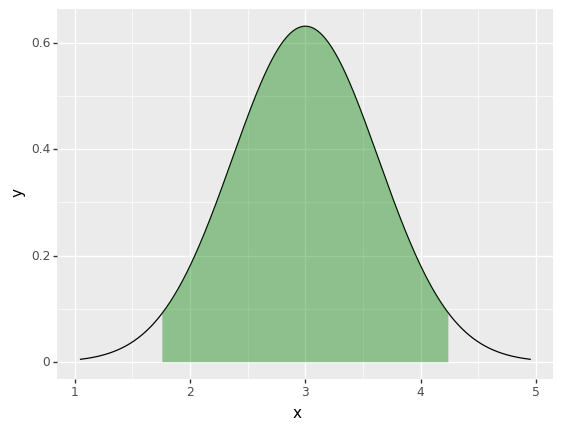

<ggplot: (8786347229507)>

In [4]:
mean_ = 3
sd_ = 2/numpy.sqrt(10)

ll = scipy.stats.norm.ppf(0.001,loc = mean_, scale = sd_)
ul = scipy.stats.norm.ppf(0.999, loc = mean_, scale = sd_)
ll_95 = scipy.stats.norm.ppf(0.025,loc = mean_, scale = sd_)
ul_95 = scipy.stats.norm.ppf(0.975,loc = mean_, scale = sd_)

x = numpy.linspace(ll,ul,num = 1000)
x_95 = numpy.linspace(ll_95,ul_95,num = 1000)
y = scipy.stats.norm.pdf(x, loc = mean_, scale = sd_)
y_95 = scipy.stats.norm.pdf(x_95, loc = mean_, scale = sd_)

df = pandas.DataFrame({"x":x, "y":y, "x_95":x_95, "y_95":y_95})

(
ggplot(df,aes(x ="x", y="y"))+
geom_line()+
geom_ribbon(aes(x = "x_95", ymax = "y_95", ymin = 0),fill = "green", alpha =0.4)
)


**Values for commonly used confidence coefficients**

|Confidence Coefficient $(1-\alpha)$|  $\alpha$ | $\alpha/2$ | $Z_{\alpha/2}$|
|:---------------------------------:|:---------:|:----------:|:--------------|
|0.90                               | 0.10      | 0.05       | 1.645         |
|0.95                               | 0.05      | 0.025      | 1.96          |
|0.98                               | 0.02      | 0.01       | 2.33          |
|0.99                               | 0.01      | 0.005      |     2.58      |

 

##    Confidence Interval for the Population Mean

Many practical problems deal with making inference or estimating population means.  For large samples $(n>30)$ we know that $\bar{x}$ is the best estimator for the population mean $\mu$ and that
$$
\bar{x}\sim N\left(\mu,\frac{\sigma^2}{n}\right).
$$
Given the sampling distribution then the confidence interval is 
$$
\bar{x}\pm Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
$$

**NOTE:** If $\sigma$ is unknown then for large samples $n>30$ it is reasonable to use the approximation $s\approx\sigma$ to compute the standard error and the test statistic $Z$.

###    Deriving the Large-Sample Confidence Interval for the Population Mean
Let $Z_{\alpha/2}$ be the value corresponding to the upper tail area of $\alpha/2$. 
$$
Z = \frac{\bar{x}-\mu}{\sigma/\sqrt{n}}
$$
then
$$
Pr\left(-Z_{\alpha/2}\leq\frac{\bar{x}-\mu}{\sigma/\sqrt{n}}\leq Z_{\alpha/2}\right)=1-\alpha
$$
Rearranging the inequality
$$
Pr\left(\bar{x}-Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\leq\mu\leq \bar{x}+Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right)=1-\alpha
$$
The UCL and LCL are the actually random quantities depending on the value of $\bar{x}$, therefore the probability for the inequality arises from the fact that for repeated samples the interval will only capture the true value of $\mu$ with probability $1-\alpha$. 

**Example: Computing a Confidence Interval for the Population Mean**\

A sample of $n=50$ adult men reveals that their average daily intake of protein is $\bar{x}=75.6$ grams per day with a standard deviation of $s=3.5$ grams.  Construct a 95\% confidence interval for the average daily intake of protein for men.  

The confidence interval is
\begin{eqnarray*}
\bar{x}&\pm& Z_{\alpha/2}SE_{\bar{x}}\\
75.6&\pm& 1.96\frac{3.5}{\sqrt{50}}\\
75.6&\pm& 0.97
\end{eqnarray*}
Thus the confidence interval is $(74.63,76.57)$. 

###    Confidence Interval for the Population Proportion

In many cases population proportions are the primary quantity of interest.  As we have seen previously that there is a convenient sampling distribution for the sample proportion $\hat{p}$ which can be used to construct a confidence interval for the population proportion $p$
$$
\hat{p}\sim N\left(p,\frac{p(1-p)}{n}\right).
$$
**NOTE:** that when $p$ is unknown the value of $\hat{p}$ can be substituted into the conditions, yielding the constraints that $n\hat{p}>5$ and $n(1-\hat{p})>5$, and it is possible to estimate the standard error as 
$$
\mbox{SE}=\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$
Given this sampleing distribution, the form of the confidence interval is the same as that for the population mean
$$
\hat{p}\pm Z_{\alpha/2}SE_{\hat{p}}
$$


**Confidence Intervals for a Population Proportion**

A random sample of $n=985$ Queensland residents seeking their opinions on how the Queensland State Government was handling the COVID-19 crisis.  Of those surveyed, $x=592$ indicated that they approved of the current government's handling of the COVID-19 crisis.  Construct a $90\%$ confidence interval for the proportion of the population that approves of the current government's handling of the COVID-19 crisis.

The estimator $\hat{p} = x/n$ is $0.60$, $n\hat{p}=592>5$ and $n(1-\hat{p})= 393>5$ so the assumptions surrounding the use of the Central Limit Theorem are valid. The resulting confidence interval is 
\begin{eqnarray*}
\hat{p}&\pm& Z_{\alpha/2}SE_{\hat{p}}\\
0.60&\pm& 1.96\sqrt{\frac{(0.6)(0.4)}{985}}\\
0.60&\pm& 0.016
\end{eqnarray*}
Thus the confidence interval is $(0.584,0.616)$. 

###    Confidence Interval for the Difference Between Two Population Means

In addition to estimating populations means, often (and more interestingly) we are interested in the difference between two population means.  
This means that now there are two populations means $\mu_1$ and $\mu_2$,  two variances $\sigma_1^2$ and $\sigma_2^2$, and two sample sizes $n_1$ and $n_2$.  And of course there are two sets of estimates $\bar{x}_1$, $s_1^2$, $\bar{x}_2$, and $s^2_2$.  

It is reasonable (and correct) to assume that the best estimate of the difference between population means $\mu_1-\mu_2$ is the difference between the sample means $\bar{x}_1-\bar{x}_2$.  The question is then, what is the sampling distribution of $\bar{x}_1-\bar{x}_2$?  

The expected value of $\bar{x}_1-\bar{x}_2$ is
$$
E(\bar{x}_1-\bar{x}_2) = \mu_1-\mu_2
$$
and the standard error is
$$
\mbox{SE} = \sqrt{\frac{\sigma^2_1}{n_1}+\frac{\sigma_2^2}{n_2}}
$$
which for large $n_1$ and $n_2$ can be approximated as 
$$
\mbox{SE} = \sqrt{\frac{s^2_1}{n_1}+\frac{s_2^2}{n_2}}
$$

1. If the two populations follow a Gaussian distribution, then the sampling distribution is exactly Gaussian.

2. If the two populations are not Gaussian, then the sampling distribution is approximately Gaussian, for $n_1>30$ and $n_2>30$. 

From this we can construct the $(1-\alpha)\%$ confidence interval for the difference $\mu_1-\mu_2$ as:
$$
(\bar{x}_1-\bar{x}_2)\pm Z_{\alpha/2}\sqrt{\frac{s^2_1}{n_1}+\frac{s_2^2}{n_2}}
$$

**Example: Confidence interval for the difference between two population means**\

Given some data on the life cycle of two different makes of car tyres.  Given sample sizes of $n_1=n_2=100$ results are collected for the service life of tyres in kilometres.  Given the data

|Tyre A                  | Tyre B                  |
|------------------------|-------------------------|
|$$\bar{x}_1 = 26,400 \text{KM}$$ | $$\bar{x}_2 = 25,100 \text{KM}$$ |
$$s_1^2 = 1,444,000 \text{(KM)}^2$$ | $$s_2^2 = 1,960,000 \text{(KM)}^2$$|

compute the $99\%$ confidence interval for the difference between the expected life-cycle for these two makes of tyre. 
The difference between the sample means is $\bar{x}_1-\bar{x}_2=1300$ and the standard error is
\begin{eqnarray*}
SE_{\bar{x}_1-\bar{x}_2}&=&\sqrt{\frac{s^2_1}{n_1}+\frac{s_2^2}{n_2}}\\
&=&\sqrt{\frac{1,444,000}{100}+\frac{1,960,000}{100}}\\
&=&184.5
\end{eqnarray*}
\begin{eqnarray*}
(\bar{x}_1-\bar{x}_2)&\pm& Z_{\alpha/2}SE_{\bar{x}_1-\bar{x}_2}\\
1300&\pm& 2.576(184.5)\\
1300&\pm& 475
\end{eqnarray*}
Thus the confidence interval is $(855,1755)$. 


##    Confidence Interval for the Difference Between Two Population Proportions

Just as we are often interested in estimating the difference between the means or two populations, we may often be interested in the difference between the proportions of two populations.  As in the case of the difference between two populations means, the best estimator for the difference between two population proportions  $p_1-p_2$, is $\hat{p}_1-\hat{p}_2$.   

The expected value of $\hat{p}_1-\hat{p}_2$ is 
$$
E(\hat{p}_1-\hat{p}_2)=p_1-p_2
$$
and the standard error is 
$$
\mbox{SE}=\sqrt{\frac{p_1(1-p_1)}{n_1}+\frac{p_2(1-p_2)}{n_2}}
$$
which is estimated as 
$$
\mbox{SE}=\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}
$$
Note that by the Central Limit Theorem,  the sampling distribution is approximately Gaussian when $n_1$ and $n_2$ are large.

From this the $(1-\alpha)\%$ confidence interval for the difference in two population proportions is:
$$
(\hat{p}_1-\hat{p}_2)\pm Z_{\alpha/2}\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}
$$
Note that the additional constraints that $n_1\hat{p}_1$,$n_1(1-\hat{p}_1)$, $n_2\hat{p}_2$, and $n_2(1-\hat{p}_2)$ all be greater than 5.  

**Example: The confidence interval for the difference between two population proportions**\
Returning to Example 7.4.1, now consider that residents are divided into urban and rural voters with the results

| | Rural | Urban |
|:---:|:-----:|:-----:|
|  Sample Size | 328 | 657 |
|  Number Approve | 249 | 427 |
| Proportion Approve | 0.76 | 0.65 |

Compute the $95\%$ confidence interval for the difference in the population proportions.  

First we can note that $\hat{p}_1 = 0.76$ and $\hat{p}_2 = 0.65$. Thus we can compute 
\begin{eqnarray*}
n_1\hat{p_1} & = & 249\\
n_1(1-\hat{p}_1) & = & 79\\
n_2\hat{p}_2 & = & 427\\
n_2(1-\hat{p}_2) & = & 230
\end{eqnarray*}
All of which are $>5$ making the assumoptions surrounding the use of the Gaussian distribution as the sampling distribution are valid.  The difference $\hat{p}_1-\hat{p}_2$ is $0.11$ and the standard error is
\begin{eqnarray*}
\mbox{SE}_{\hat{p}_1-\hat{p}_2}&=&\sqrt{\frac{(0.76)(0.24)}{328}+\frac{(0.65)(0.35)}{657}}\\
&=& 0.030
\end{eqnarray*}

Thus the resulting confidence interval is
$$
0.11\pm Z_{\alpha/2}\sqrt{\frac{(0.76)(0.24)}{328}+\frac{(0.65)(0.35)}{657}}
$$
$(0.070,0.140)$.

 


## Worksheet Practical Question 1

Find the confidence interval for the mean of the `IMDB.Ranking` for *Star Trek* (The Original Series). 

In [ ]:
df = pandas.read_csv("../DATA/star_trek_data.csv")


Recall that the confidence interval has the form
$$
\hat{\theta}\pm SE_{\hat{\theta}}Z_{\alpha/2}.
$$
In this case $\hat{\theta}=\bar{x}$ and the $SE_{\bar{x}}$ is 
$$
SE_{\bar{x}}=\frac{s}{\sqrt{n}}
$$
and $Z_{\alpha/2}=1.96$.

**Solution:**\

In [5]:

df = pandas.read_csv("../DATA/star_trek_data.csv")

df_tos = df[df["Series"]=="TOS"]

xbar = df_tos["IMDB.Ranking"].mean()
s = df_tos["IMDB.Ranking"].std()
n = df_tos.shape[0]

SE = s/numpy.sqrt(n)

UCL = xbar+1.96*SE

LCL = xbar-1.96*SE
print(LCL,UCL)


7.36010366779833 7.7123963322016715


## Worksheet Practical Question 2

Find the confidence interval for the difference of the mean `IMDB.Ranking` for *Star Trek* (The Original Series) and *Star Trek: The Next Generation*. 

In [ ]:
df = pandas.read_csv("../DATA/star_trek_data.csv")


Recall that the confidence interval has the form
$$
\hat{\theta}\pm SE_{\hat{\theta}}Z_{\alpha/2}.
$$
In this case $\hat{\theta}=\bar{x}_1-\bar{x}_2$ and the $SE_{\bar{x}_1-\bar{x}_2}$ is 
$$
SE_{\bar{x}}=\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}
$$
and $Z_{\alpha/2}=1.96$.

**Solution:**\

In [6]:
df = pandas.read_csv("../DATA/star_trek_data.csv")

df_tos = df[df["Series"]=="TOS"]
df_tng = df[df["Series"]=="TNG"]

xbar_tos = df_tos["IMDB.Ranking"].mean()
var_tos = df_tos["IMDB.Ranking"].var()
n_tos = df_tos.shape[0]

xbar_tng = df_tng["IMDB.Ranking"].mean()
var_tng = df_tng["IMDB.Ranking"].var()
n_tng = df_tng.shape[0]

SE = numpy.sqrt(var_tos/n_tos+var_tng/n_tng)

UCL = (xbar_tos-xbar_tng)+1.96*SE

LCL = (xbar_tos-xbar_tng)-1.96*SE

print(LCL,UCL)

-0.13246722545781822 0.30946160748029816


## Worksheet Practical Question 3
Find the proportion of *Star Trek: The Next Generation* epsiodes that pass the Bechdel-Wallace test.

Find the $0.95\%$ confidence interval for the proportion of *Star Trek: The Next Generation* episodes that pass the Bechdel-Wallace Test.

In [ ]:
df = pandas.read_csv("../DATA/star_trek_data.csv")


Recall that the confidence interval has the form
$$
\hat{\theta}\pm SE_{\hat{\theta}}Z_{\alpha/2}.
$$
In this case $\hat{\theta}=\hat{p}$ and the $SE_{\hat{p}}$ is 
$$
SE_{\hat{p}}=\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$
and $Z_{\alpha/2}=1.96$.

**Solution:**\

In [7]:
df = pandas.read_csv("../DATA/star_trek_data.csv")

df_tng = df[df["Series"]=="TNG"]

p_tng = df_tng["Bechdel.Wallace.Test"].value_counts(normalize = True)[0]
n_tng = df_tng.shape[0]

SE<-numpy.sqrt(p_tng*(1-p_tng)/n_tng)

UCL = p_tng+1.96*SE

LCL = p_tng-1.96*SE
print(LCL,UCL)

0.3408333363399306 0.782762169278047


## Worksheet Practical Question 4

Find the overall proportion of episodes that pass the Bechdel-Wallace test, and the proportion of *Star Trek: The Next Generation* epsiodes that pass the Bechdel-Wallace test.

Fnd the $95\%$ confidence interval for the difference in proportions between *Star Trek: The Next Generation* and *Star Trek: Voyager*. 

In [ ]:
df = pandas.read_csv("../DATA/star_trek_data.csv")



Recall that the confidence interval has the form
$$
\hat{\theta}\pm SE_{\hat{\theta}}Z_{\alpha/2}.
$$
In this case $\hat{\theta}=\hat{p}_1-\hat{p}_2$ and $SE_{\hat{p}_1-\hat{p}_2}$ is
$$
SE_{\hat{p}_1-\hat{p}_2}=\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}
$$
and $Z_{\alpha/2}$ is 1.96.

**Solution:**\

In [8]:
df = pandas.read_csv("../DATA/star_trek_data.csv")

df_tng = df[df["Series"]=="TNG"]
df_voy = df[df["Series"]=="VOY"]

p_tng = df_tng["Bechdel.Wallace.Test"].value_counts(normalize = True)[0]
n_tng = df_tng.shape[0]

p_voy = df_voy["Bechdel.Wallace.Test"].value_counts(normalize = True)[0]
n_voy = df_voy.shape[0]


SEnu = numpy.sqrt(p_tng*(1-p_tng)/n_tng)+(p_voy*(1-p_voy)/n_voy)

UCL = (p_tng-p_voy)+1.96*SE  ##  Upper Confidence Limit

LCL = (p_tng-p_voy)-1.96*SE  ##  Lower Confidence Limit

print(LCL,UCL)

0.18385659215388409 0.6257854250920005


##    Additional Questions for Practice

Load the `epa_data` and answer the following:

1.    Find the $95\%$ confidence interval for the average city fuel economy of cars produces in 1990.

In [ ]:
df = pandas.read_csv("../DATA/epa_data.csv")


**Solution:**\

In [9]:
df = pandas.read_csv("../DATA/epa_data.csv")

df_1990 = df[df["year"]==1990]

xbar = df_1990["city"].mean()
s = df_1990["city"].std()
n = df_1990.shape[0]

LCL = xbar-1.96*(s/numpy.sqrt(n))
UCL = xbar+1.96*(s/numpy.sqrt(n))

print(LCL,UCL)


16.76329100170592 17.30349935079872


2.    Find the $95\%$ confidence interval for the difference between the average city and highway fuel economy for cars produced in 1990.

In [ ]:
df = pandas.read_csv("../DATA/epa_data.csv")


**Solution:**\

In [10]:
df = pandas.read_csv("../DATA/epa_data.csv")

df = df[df["year"]==1990]

xbar_city = df["city"].mean()
var_city = df["city"].var()
n_city = df.shape[0]

xbar_hwy = df["hwy"].mean()
var_hwy = df["hwy"].var()
n_hwy = df.shape[0]

SE = numpy.sqrt(var_hwy/n_hwy+var_city/n_city)

LCL = (xbar_city-xbar_hwy)-1.96*SE
UCL = (xbar_city-xbar_hwy)+1.96*SE

print(LCL,UCL)

-5.736889029941181 -4.871645292878854


3.    Find the $95\%$ confidence interval for the proportion of cars produced with manual transmissions in 1990. 

In [ ]:
df = pandas.read_csv("../DATA/epa_data.csv")


**Solution:**\

In [11]:
df = pandas.read_csv("../DATA/epa_data.csv")
df_1990 = df[df["year"]==1990]

phat = df_1990["trans"].value_counts(normalize = True)[1]

SE = numpy.sqrt(phat*(1-phat)/n)

LCL = phat-1.96*SE
UCL = phat+1.96*SE

print(LCL,UCL)


0.4063900612026801 0.4655950964967633


4.    Find the $95\%$ confidence interval for the difference between the proportion of cars produced with manual transmissions for the years 1990 and 2010. 

In [ ]:
df = pandas.read_csv("../DATA/epa_data.csv")


In [12]:
df = pandas.read_csv("../DATA/epa_data.csv")
df_1990 = df[df["year"]==1990]
df_2010 = df[df["year"]==2010]

phat_1990 = df_1990["trans"].value_counts(normalize = True)[1]
phat_2010 = df_2010["trans"].value_counts(normalize = True)[1]
n_1990 = df_1990.shape[0]
n_2010 = df_2010.shape[0]

SE = numpy.sqrt(phat_1990*(1-phat_1990)/n_1990+phat_2010*(1-phat_2010)/n_2010)

LCL = (phat_1990-phat_2010)-1.96*SE
UCL = (phat_1990-phat_2010)+1.96*SE

print(LCL,UCL)

0.15361545023191714 0.2314445496677066
